# Gowdy symmetric cosmological models with Cauchy horizons ruled by non-closed null generators by Hennig
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 18, 2022

https://arxiv.org/abs/1404.4080

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [9]:
t,theta,rho1,rho2,dt,dtheta,drho1,drho2,R0 = symbols('t theta rho1 rho2 dt dtheta drho2 drho2 R0')

In [4]:
u = Function('u')(t,theta)
u

In [5]:
Q = Function('Q')(t,theta)
Q

In [6]:
M = Function('M')(t,theta)
M

In [7]:
variables = Matrix([t,theta,rho1,rho2])
variables

⎡t ⎤
⎢  ⎥
⎢θ ⎥
⎢  ⎥
⎢ρ₁⎥
⎢  ⎥
⎣ρ₂⎦

In [8]:
differentials = Matrix([dt,dtheta,drho1,drho2])
differentials 

⎡  dt  ⎤
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎢drho₂ ⎥
⎢      ⎥
⎣drho₂ ⎦

In [11]:
lineElement = expand( exp(M) * (-dt**2 + dtheta**2) + R0 * (sin(t)**2 * exp(u) * (drho1 + Q*drho2 )**2 + sin(theta)**2 * exp(-u) * drho2**2)) 
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  M(t, θ)                                                                                  
⎢-ℯ            0                                                          0                 
⎢                                                                                           
⎢            M(t, θ)                                                                        
⎢    0      ℯ                                                             0                 
⎢                                                                                           
⎢                                                                                           
⎢                         2        u(t, θ)    2                    u(t, θ)    2          u(t
⎢    0         0      R₀⋅Q (t, θ)⋅ℯ       ⋅sin (t) + 2⋅R₀⋅Q(t, θ)⋅ℯ       ⋅sin (t) + R₀⋅ℯ   
⎢                                                                                           
⎢                                                                     

In [14]:
import sympy

In [15]:
m = sympy.Array(g)
m

⎡  M(t, θ)                                                                                  
⎢-ℯ            0                                                          0                 
⎢                                                                                           
⎢            M(t, θ)                                                                        
⎢    0      ℯ                                                             0                 
⎢                                                                                           
⎢                                                                                           
⎢                         2        u(t, θ)    2                    u(t, θ)    2          u(t
⎢    0         0      R₀⋅Q (t, θ)⋅ℯ       ⋅sin (t) + 2⋅R₀⋅Q(t, θ)⋅ℯ       ⋅sin (t) + R₀⋅ℯ   
⎢                                                                                           
⎢                                                                     

In [16]:
from einsteinpy.symbolic import *

In [17]:
syms = sympy.symbols("t theta rho1 rho2")
t,theta,rho1,rho2 = syms

In [18]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢⎡∂            ∂                                                                            
⎢⎢──(M(t, θ))  ──(M(t, θ))                                                                  
⎢⎢∂t           ∂θ                                                                           
⎢⎢───────────  ───────────                                                                  
⎢⎢     2            2                                                                       
⎢⎢                                                                                          
⎢⎢∂            ∂                                                                            
⎢⎢──(M(t, θ))  ──(M(t, θ))                                                                  
⎢⎢∂θ           ∂t                                                                           
⎢⎢───────────  ───────────                                            

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

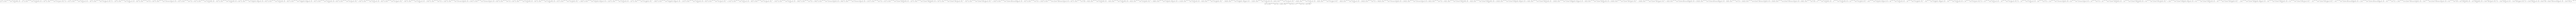

In [21]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [22]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛    2              2         ⎞                                                            
⎢⎜   ∂              ∂          ⎟ ⎛ 2        2⋅u(t, θ)    2                 2⋅u(t, θ)    2   
⎢⎜- ───(M(t, θ)) + ───(M(t, θ))⎟⋅⎝Q (t, θ)⋅ℯ         ⋅sin (t) + 2⋅Q(t, θ)⋅ℯ         ⋅sin (t)
⎢⎜    2              2         ⎟                                                            
⎢⎝  ∂t             ∂θ          ⎠                                                            
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                             2                             
⎢                                                                                           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                     

In [23]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [24]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [25]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [26]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡      ⎛                                                                                    
⎢      ⎜     4        4⋅u(t, θ)    4    ∂           ∂                  4        4⋅u(t, θ)   
⎢0.125⋅⎜1.0⋅Q (t, θ)⋅ℯ         ⋅sin (t)⋅──(M(t, θ))⋅──(u(t, θ)) + 1.0⋅Q (t, θ)⋅ℯ         ⋅si
⎢      ⎜                                ∂t          ∂t                                      
⎢      ⎝                                                                                    
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     